**Name:** Jasmine Huynh 

**Email:** jasminehuynh.info@gmail.com

# RSR Prediction Model - Estimating Final Ratings for Horses

## Table of Contents

1. **Project Overview**
    - 1.1 Choosing options and the reasons
    - 1.2 Dataset Description
    - 1.3 Methodology

2. **Data Exploration**
    - 2.1 Import Sample Horse Racing dataset
    - 2.2 Overview of the dataset
    - 2.3 Comments on the dataset
    - 2.4 Some visualization of dataset
        - 2.4.1 Data visualization to examine RSR
        - 2.4.2 Data visualization to examine the correlation between variables
    
3. **Data Preparation**
    - 3.1 Data Cleaning
        - 3.1.1 Missing Value Imputation
        - 3.1.2 Outlier Treatment
    - 3.2 Data Transformation
        - 3.2.1 Encoding Categorical Variables
        - 3.2.2 Drop Irrelevant Columns
        - 3.2.3 Final Checking
    - 3.3 Features Engineering
        - 3.3.1 Advanced Feature Engineering
        - 3.3.2 Splitting the Dataset
        - 3.3.3 Scale the Dataset

4. **Train a Linear Model**
    - 4.1 Train a Linear Model
    - 4.2 Comments on the Performance of the Linear Regression Model

5. **Train a KNN Model**
    - 5.1 Train a Basic KNN Model
    - 5.2 Train KNN with K-Fold Cross-Validation
    - 5.3 Comments on the Performance of the KNN Model

6. **Train Decision Trees Model**
    - 6.1 Train a Decision Trees Model
    - 6.2 Comments on the Performance of the Decision Trees Mode

7. **Train Random Forest Model**
    - 7.1 Train a Basic Random Forest Model
    - 7.2 Comments on the Performance of the Random Forest Model

8. **Train Gradient Boosting Machine Model**
    - 7.1 Train a Gradient Boosting Machine Model
    - 7.2 Comments on the Performance of the Gradient Boosting Machine Model

9. **Visualize, Compare and Analyze the Results**
    - 9.1 Bar Plot of RMSE and MSE Across All Models
    - 9.2 Model Performance Analysis
    - 9.3 Comments for non-technical audience
    - 9.4 Final conclusion
---

## **1. Project Overview**

### **1.1 Choosing options and the reasons**: 
**I choose Option B, "Predicting the Final RSR" for several reasons:**

**1. Greater Depth in Analysis:** Firstly, predicting RSR offers a more nuanced understanding of a horse's performance by focusing on consistency and capability over time, compared to the immediate results analyzed in Option A. This approach evaluates long-term trends rather than outcomes of single races, providing a deeper and broader perspective on performance.

**2. Enhanced Predictive Complexity:** Secondly, the task of estimating RSR involves handling complex data and applying advanced statistical or machine learning methods, more so than the straightforward prediction of race outcomes. This complexity not only challenges me to develop more robust predictive models but also helps in build skills that are highly valued in data science, such as model generalization and validation techniques.

**3. Strategic Value:** Thirdly, understanding RSR provides strategic insights that are crucial for long-term decision-making in horse racing, such as training adjustments and breeding choices. This is in contrast to predicting race outcomes, which may offer immediate results but less strategic depth. The ability to analyze and interpret long-term performance metrics like RSR is invaluable in making informed decisions that have lasting impacts.

By choosing Option B, I am positioning myself to develop a richer set of skills and deliver insights that have broader applications and strategic value, exceeding what is typically achieved by focusing solely on race outcomes.


### **1.2 Dataset Description:**

The dataset contains information about horse races, including details about the horses, jockeys, trainers, and race conditions. Here is a summary of the dataset:

- **Target Variable:** 
  - `RSR`: The horse's Rating Standardized over Races.


- **Predictor Variables:** 
-  `Date `: The date of the race.
-  `Track `: The track where the race took place.
-  `RaceNumber `: The number of the race.
-  `HorseNumber `: The number assigned to the horse in the race.
-  `HorseName `: The name of the horse.
-  `Weight `: The weight carried by the horse.
-  `RSRLastRun `: The horse's Rating Standardized over Races in its last run.
-  `Barrier `: The starting barrier of the horse in the race.
-  `Jockey `: The jockey riding the horse.
- `Odds `: The betting odds for the horse.
-  `Trainer `: The trainer of the horse.
-  `RunsFromSpell `: The number of runs since the horse's last win.
-  `DaysSinceLastRun `: The number of days since the horse's last run.
-  `LastStartFinishPosition `: The horse's finishing position in its last start.
-  `Distance `: The distance of the race.
-  `Age `: The age of the horse.
-  `Starts `: The number of starts the horse has had.


The dataset contains 2735 entries and 18 columns. 

### **1.3 Methodology:**

The efficacy of the predictive models will be assessed using the Root Mean Squared Error (RMSE). This metric gives a holistic measure of the prediction accuracy of the model. It computes the square root of the average squared differences between the predicted and the actual property sale prices. **A lower RMSE signifies a model that can predict RSR with higher precision, implying that the predicted RSR values align more closely with the observed RSR values.**

The mathematical representation for RMSE is:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (predicted_i - actual_i)^2}
$$ or $$
RMSE = \sqrt{MSE}
$$


## **2. Data Exploration:**

### **2.1 Import Sample Horse Racing dataset:**

In [1]:
import pandas as pd
import numpy as np


# Loading the dataset
df = pd.read_csv('Sample Horse Racing Data.csv')

# Remove the 'FinishPosition' column as per the guidelines
df.drop('FinishPosition', axis=1, inplace=True)

### **2.2 Overview of the dataset:**

In [2]:
# Checking dataframe shape
df.shape

(2735, 18)

In [3]:
# Display the first few rows of the dataset
df.head()

,Date,Track,RaceNumber,HorseNumber,HorseName,Weight,RSRLastRun,Barrier,Jockey,Odds,Trainer,RunsFromSpell,DaysSinceLastRun,LastStartFinishPosition,Distance,Age,Starts,RSR
0,7/11/2023,Ascot,1,1,Go Go Grommet,58.5,68.133333,3,Madi Derrick,3.1,Tiarnna Robertson,0,110.0,9.0,1000,4,5,76.975
1,7/11/2023,Ascot,1,2,Bayezid,59.0,72.825000,2,Jarrad Noske,5.0,Tiarnna Robertson,3,13.0,4.0,1000,4,9,83.700
2,7/11/2023,Ascot,1,3,Deep Point,59.0,64.000000,4,Clinton Porter,12.0,C & M Gangemi,0,90.0,8.0,1000,4,8,75.175
3,7/11/2023,Ascot,1,4,Rockaria,58.5,65.350000,1,S Parnham,13.0,T M Wolfe,5,19.0,5.0,1000,4,7,75.050
4,7/11/2023,Ascot,1,5,Dreamers Never Die,57.5,61.495833,5,Chris Parnham,3.3,Luke Fernie,0,143.0,8.0,1000,3,3,74.250


In [4]:
# Summary statistics of dataset
df.describe()

,RaceNumber,HorseNumber,Weight,RSRLastRun,Barrier,Odds,RunsFromSpell,DaysSinceLastRun,LastStartFinishPosition,Distance,Age,Starts,RSR
count,2735.000000,2735.000000,2735.000000,2493.000000,2735.000000,2735.000000,2735.000000,2605.000000,2605.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,4.744059,6.650457,56.805302,69.683644,5.659598,24.649945,3.102011,44.419194,5.372745,1401.069835,4.869470,16.675686,68.775499
std,2.474954,4.119193,2.420542,14.592208,3.470119,33.568982,3.753591,69.749437,3.214614,404.595395,1.505464,15.045011,14.685454
min,1.000000,1.000000,50.000000,-151.453662,1.000000,1.300000,0.000000,3.000000,0.000000,800.000000,2.000000,0.000000,-110.424997
25%,3.000000,3.000000,55.000000,62.841666,3.000000,5.500000,1.000000,13.000000,3.000000,1100.000000,4.000000,5.000000,61.975001
50%,5.000000,6.000000,57.000000,70.800000,5.000000,12.000000,2.000000,17.000000,5.000000,1300.000000,5.000000,13.000000,70.400000
75%,7.000000,9.000000,58.500000,78.100000,8.000000,26.000000,4.000000,30.000000,8.000000,1600.000000,6.000000,24.000000,78.004167
max,10.000000,24.000000,71.500000,102.300000,23.000000,201.000000,71.000000,922.000000,17.000000,3200.000000,12.000000,95.000000,107.100000


In [5]:
# Display the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735 entries, 0 to 2734
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2735 non-null   object 
 1   Track                    2735 non-null   object 
 2   RaceNumber               2735 non-null   int64  
 3   HorseNumber              2735 non-null   int64  
 4   HorseName                2735 non-null   object 
 5   Weight                   2735 non-null   float64
 6   RSRLastRun               2493 non-null   float64
 7   Barrier                  2735 non-null   int64  
 8   Jockey                   2730 non-null   object 
 9   Odds                     2735 non-null   float64
 10  Trainer                  2735 non-null   object 
 11  RunsFromSpell            2735 non-null   int64  
 12  DaysSinceLastRun         2605 non-null   float64
 13  LastStartFinishPosition  2605 non-null   float64
 14  Distance                

In [6]:
# Check for missing values
df.isnull().sum()

Date                         0
Track                        0
RaceNumber                   0
HorseNumber                  0
HorseName                    0
Weight                       0
RSRLastRun                 242
Barrier                      0
Jockey                       5
Odds                         0
Trainer                      0
RunsFromSpell                0
DaysSinceLastRun           130
LastStartFinishPosition    130
Distance                     0
Age                          0
Starts                       0
RSR                          0
dtype: int64

### **2.3 Comments on the dataset:**
The dataset contains detailed information about horse races, including various attributes of the horses, jockeys, trainers, and race conditions. However, there are several points to note:

1. **Missing Values:** The columns RSRLastRun, Jockey, DaysSinceLastRun, and LastStartFinishPosition have missing values that need to be addressed through imputation or removal.

2. **Negative RSR Values:** The RSRLastRun column contains negative values, which are uncommon for a standardized rating. These values should be investigated and corrected if necessary.

3. **Outliers:** Some columns have extreme values that may be outliers, such as the maximum value in the DaysSinceLastRun column. These outliers should be examined and potentially adjusted.

4. **Data Types:** The Date column is stored as an object (string) data type. Converting this column to a datetime format would facilitate easier manipulation and analysis.


### **2.4 Some visualization of dataset:**

#### **2.4.1 Data visualization to examine RSR:**

C:\Users\HP\BUSA3020\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


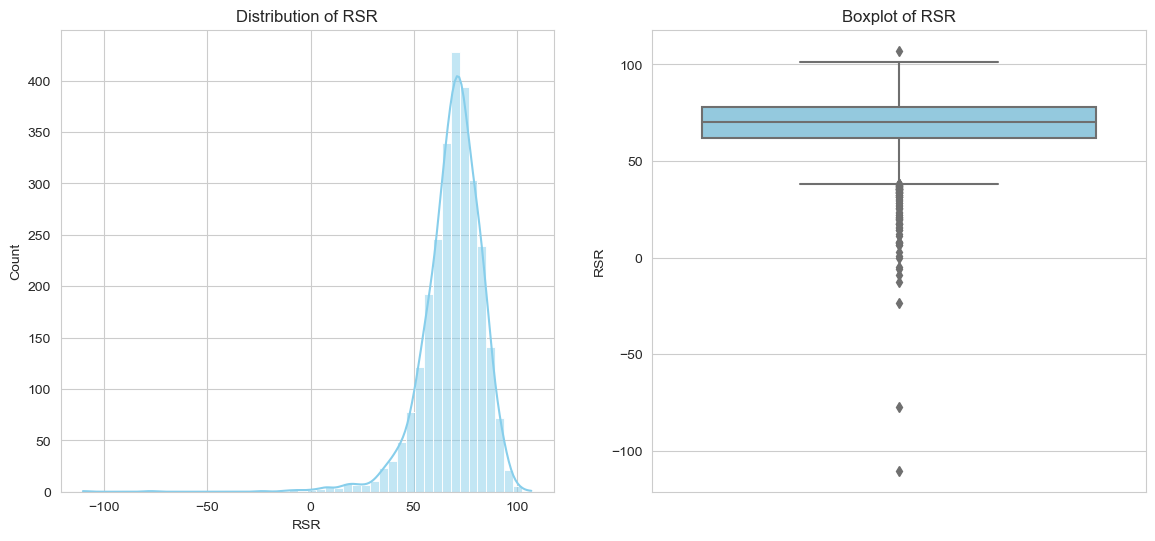

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style and size
sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))

# Histogram to visualize the distribution
plt.subplot(1, 2, 1)
sns.histplot(df['RSR'], kde=True, color="skyblue", bins=50)
plt.title('Distribution of RSR')
plt.xlabel('RSR')
plt.ylabel('Count')

# Boxplot to check for outliers and get statistical view
plt.subplot(1, 2, 2)
sns.boxplot(y=df['RSR'], color="skyblue")
plt.title('Boxplot of RSR')
plt.show()

In [8]:
# Descriptive statistics for the RSR column
describe_rsr = df['RSR'].describe()

# Print the statistics
print("RSR Statistics:\n")
print("Mean RSR:", round(describe_rsr['mean'], 2))
print("Median RSR:", round(describe_rsr['50%'], 2))
print("Standard Deviation RSR:", round(describe_rsr['std'], 2))
print("Lowest RSR (min):", describe_rsr['min'])
print("Highest RSR (max):", describe_rsr['max'])
print("\nInterquartile Range (IQR):")
print("25th Percentile (Q1):", describe_rsr['25%'])
print("75th Percentile (Q3):", describe_rsr['75%'])

# Determine outliers using the IQR method
IQR_rsr = describe_rsr['75%'] - describe_rsr['25%']
lower_bound_rsr = describe_rsr['25%'] - (1.5 * IQR_rsr)
upper_bound_rsr = describe_rsr['75%'] + (1.5 * IQR_rsr)

print("\nOutliers Boundaries:")
print("RSR below", lower_bound_rsr, "and above", upper_bound_rsr, "can be considered as outliers.")

# Count outliers
outliers_rsr = df[(df['RSR'] < lower_bound_rsr) | (df['RSR'] > upper_bound_rsr)]
print("\nNumber of Outliers:", outliers_rsr.shape[0])

RSR Statistics:

Mean RSR: 68.78
Median RSR: 70.4
Standard Deviation RSR: 14.69
Lowest RSR (min): -110.4249965
Highest RSR (max): 107.1

Interquartile Range (IQR):
25th Percentile (Q1): 61.975000525
75th Percentile (Q3): 78.004166615

Outliers Boundaries:
RSR below 37.93125138999999 and above 102.04791575000002 can be considered as outliers.

Number of Outliers: 81


**Comments:**

The RSR (Rating Standardized over Races) statistics reveal some key insights about the dataset:

- Mean and Median RSR: The mean RSR is 68.78, indicating the average performance rating of horses in the dataset, while the median RSR is 70.4, suggesting a slightly right-skewed distribution with some lower-performing horses pulling the mean down.

- Standard Deviation of RSR: The standard deviation of 14.69 indicates a moderate level of variability in the RSR values, with some horses significantly deviating from the mean.

- Range of RSR: The range of RSR values is quite wide, from -110.42 to 107.1, indicating the presence of extreme values.

- Outliers: The IQR method identifies 81 outliers in the dataset, horses whose RSR values fall below 37.93 or above 102.05. These outliers could represent exceptional cases that deviate significantly from the typical performance levels seen in the dataset.

#### **2.4.2 Data visualization to examine the correlation between variables**

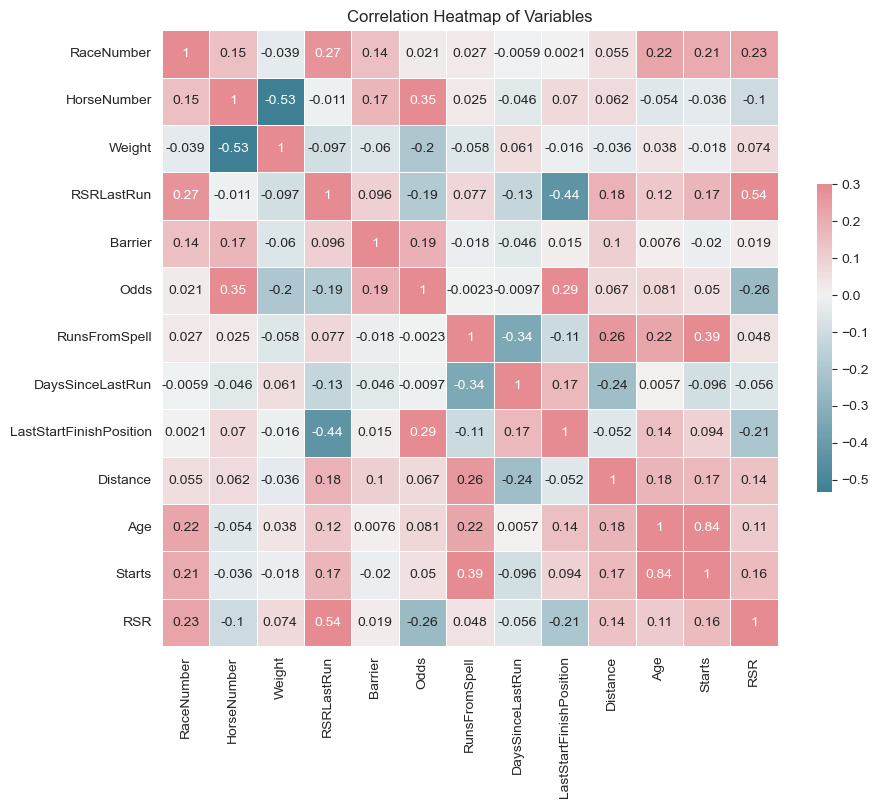

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap of Variables")
plt.show()

---
#### **Analysis on Correlations between Variables:**

- **`RaceNumber` vs. Other Variables:** 
  - `RaceNumber` has a very weak positive correlation with most other variables, including `HorseNumber` (0.149), `Barrier` (0.143), `Age` (0.216), and `Starts` (0.209). This suggests a slight tendency for higher race numbers to be associated with higher horse numbers, barriers, ages, and starts, but the correlations are too weak to draw meaningful conclusions.

- **`HorseNumber` vs. Other Variables:**
  - `HorseNumber` has a strong negative correlation with `Weight` (-0.534), indicating that horses with higher numbers tend to have lower weights. This could be a random assignment of horse numbers or could be related to the size or age of the horse, but further investigation is needed to confirm.
  - `HorseNumber` also has moderate positive correlations with `Odds` (0.346) and weak positive correlations with `Barrier` (0.173). This suggests that horses with higher numbers might be associated with higher odds and barrier numbers, but again, the causality is unclear.

- **`Weight` vs. Other Variables:**
  - `Weight` has a strong negative correlation with `HorseNumber` (-0.534), indicating that horses with higher numbers tend to have lower weights, which aligns with the earlier observation.
  - `Weight` has a moderate negative correlation with `Odds` (-0.204), suggesting that lighter horses might be associated with higher odds. However, this relationship could be influenced by other factors such as horse performance history or race conditions.

- **`RSRLastRun` vs. Other Variables:**
  - `RSRLastRun` has a strong positive correlation with `RSR` (0.543), indicating that horses with higher last run ratings tend to have higher overall ratings. This relationship is expected and indicates some level of consistency in horse performance across races.

- **Overall Implications:** 
  - These correlations provide some insights into potential relationships between race, horse, and performance variables. However, the correlations are mostly weak or moderate, indicating that these variables alone may not be sufficient to predict race outcomes or horse performance accurately. Other factors such as track conditions, jockey performance, and horse training could also play significant roles, highlighting the complexity of predicting horse race outcomes.


## **3. Data Preparation:**

### **3.1 Data Cleaning:**

#### **3.1.1 Missing Value Imputation:**

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# Impute missing values for 'RSRLastRun', 'Jockey', and 'DaysSinceLastRun' columns
imputer = SimpleImputer(strategy='mean')
df['RSRLastRun'] = imputer.fit_transform(df[['RSRLastRun']])
df['DaysSinceLastRun'] = imputer.fit_transform(df[['DaysSinceLastRun']])
df['LastStartFinishPosition'] = imputer.fit_transform(df[['LastStartFinishPosition']])


# For categorical column 'Jockey', we'll use the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df['Jockey'] = imputer.fit_transform(df[['Jockey']])

# Confirm missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Date                       0
Track                      0
RaceNumber                 0
HorseNumber                0
HorseName                  0
Weight                     0
RSRLastRun                 0
Barrier                    0
Jockey                     0
Odds                       0
Trainer                    0
RunsFromSpell              0
DaysSinceLastRun           0
LastStartFinishPosition    0
Distance                   0
Age                        0
Starts                     0
RSR                        0
dtype: int64


#### **3.1.2 Outlier Treatment:**

In [11]:
# Function to remove outliers based on the IQR
def remove_outliers(df, column_list):
    for column in column_list:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Condition to keep only the values that fall within the 1.5*IQR of the Q1 and Q3
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

# List of numeric columns to check for outliers
numeric_cols = ['RSRLastRun', 'Odds', 'DaysSinceLastRun', 'LastStartFinishPosition', 'Distance', 'Age', 'Starts', 'RSR']

# Removing outliers
df_clean = remove_outliers(df, numeric_cols)

# Assigning the cleaned DataFrame back to 'df'
df = df_clean

# Check the shape of the data after removing outliers
print(df.shape)

(1783, 18)


**Checking "Outlier Treatment":**

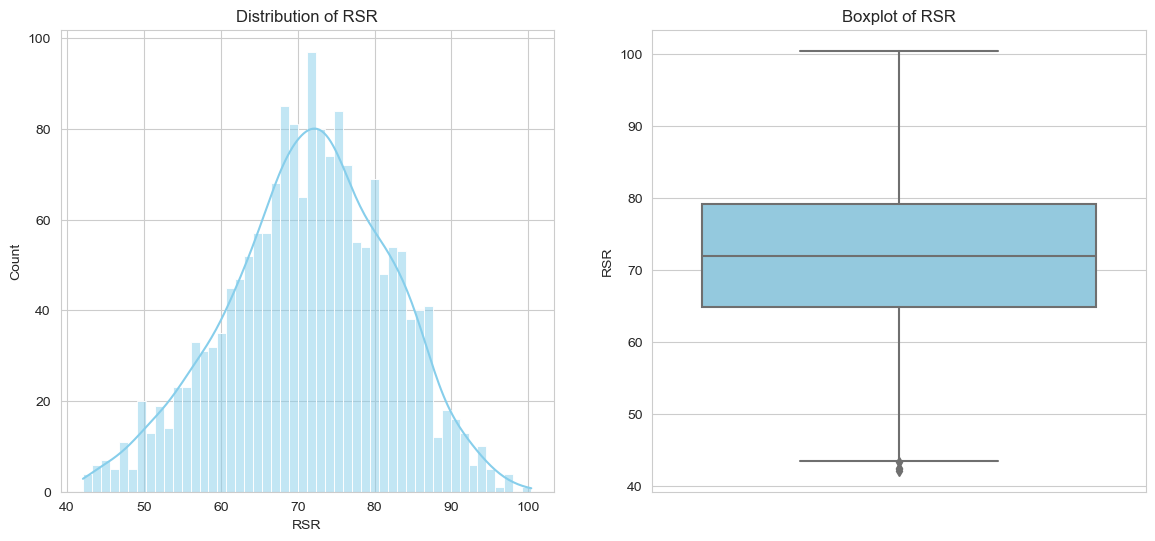

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style and size
sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))

# Histogram to visualize the distribution
plt.subplot(1, 2, 1)
sns.histplot(df['RSR'], kde=True, color="skyblue", bins=50)
plt.title('Distribution of RSR')
plt.xlabel('RSR')
plt.ylabel('Count')

# Boxplot to check for outliers and get statistical view
plt.subplot(1, 2, 2)
sns.boxplot(y=df['RSR'], color="skyblue")
plt.title('Boxplot of RSR')
plt.show()

The post-cleaning visuals indicate a more standardized RSR distribution, conducive to statistical modeling. The histogram reflects a normal distribution, and the boxplot shows fewer extremes. It’s crucial to ensure this cleaner data still encapsulates the diversity of racing scenarios for robust model performance. If outlier removal hasn't omitted key variations, your dataset is well-prepped for further analysis.

### **3.2 Data Transformation:**

#### **3.2.1 Encoding Categorical Variables:**

In [13]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Initialize the ordinal encoder for the categorical variables
encoder = OrdinalEncoder()

# Define the categorical columns you want to encode
# Assuming 'Track', 'HorseName', 'Jockey', and 'Trainer' are the only categorical columns you want to encode
columns_to_encode = ['Track', 'HorseName', 'Jockey', 'Trainer']

# Fit and transform the selected columns
# Before fitting, you can fill NaN values with a placeholder if necessary, for example with 'missing'
df['Jockey'].fillna('missing', inplace=True)
encoded_features = encoder.fit_transform(df[columns_to_encode])

# The encoded features are returned as a numpy array, we need to convert it to a DataFrame
# and assign meaningful column names
encoded_df = pd.DataFrame(encoded_features, columns=[f"{col}_encoded" for col in columns_to_encode])

# Drop original categorical columns from df
df = df.drop(columns=columns_to_encode)

# Concatenate encoded features back to df
df = pd.concat([df, encoded_df], axis=1)

# Display the first few rows of the dataframe to see the encoded columns
print(df.head())

         Date  RaceNumber  HorseNumber  Weight  RSRLastRun  Barrier  Odds  \
1  2023-07-11         1.0          2.0    59.0   72.825000      2.0   5.0   
3  2023-07-11         1.0          4.0    58.5   65.350000      1.0  13.0   
5  2023-07-11         1.0          6.0    57.5   72.225000      6.0   5.5   
9  2023-07-11         2.0          4.0    58.0   73.000000      5.0  12.0   
11 2023-07-11         2.0          7.0    56.0   80.967857     10.0   2.1   

    RunsFromSpell  DaysSinceLastRun  LastStartFinishPosition  Distance  Age  \
1             3.0              13.0                      4.0    1000.0  4.0   
3             5.0              19.0                      5.0    1000.0  4.0   
5             3.0              13.0                      3.0    1000.0  3.0   
9             1.0              12.0                      2.0    1500.0  4.0   
11            2.0              17.0                      5.0    1500.0  3.0   

    Starts     RSR  Track_encoded  HorseName_encoded  Jockey_e

#### **3.2.2 Drop Irrelevant Columns:** 

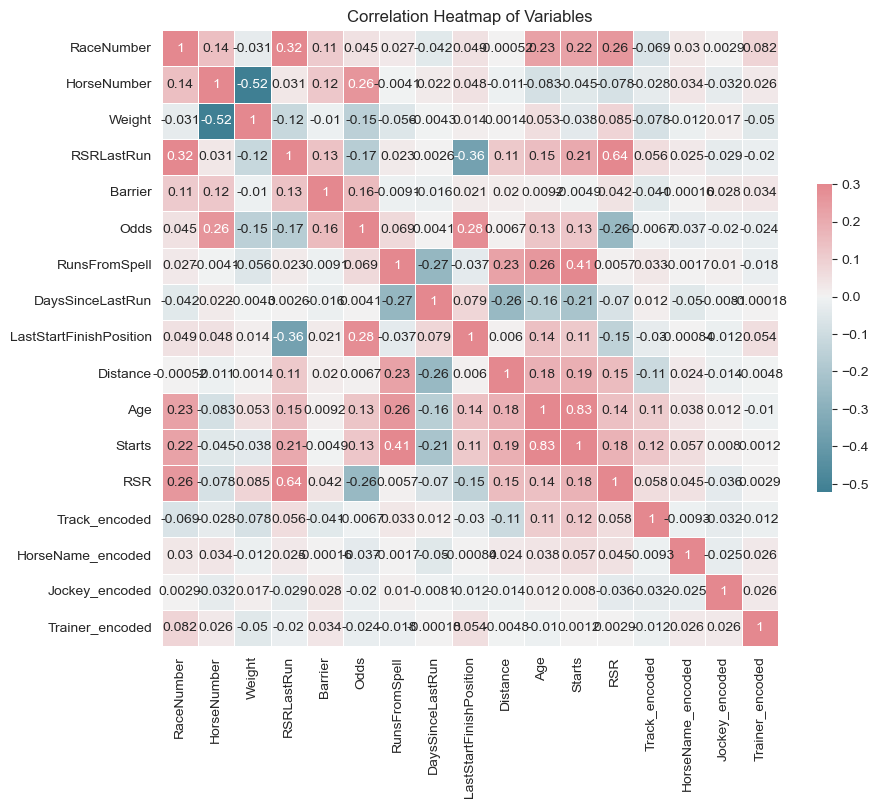

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap of Variables")
plt.show()

#### Explanation: 
Based on the correlation heatmap, certain columns do not significantly influence the target variable (RSR).
- Specifically, columns like 'RaceNumber' and 'HorseNumber' may simply be identifiers and do not have predictive power.
- Similarly, columns with low correlation to 'RSR' (e.g., less than 0.1) might not be useful in the modeling process and can add noise.
- Therefore, these columns will be removed to simplify the model and potentially improve its performance.


In [15]:
# List of columns to drop based on the heatmap analysis and their relevance
columns_to_drop = ['RaceNumber', 'HorseNumber', 'Date']

# Dropping the identified columns
df.drop(columns=columns_to_drop, inplace=True)

# Displaying the first few rows of the dataframe to verify the columns have been dropped
print(df.head())

    Weight  RSRLastRun  Barrier  Odds  RunsFromSpell  DaysSinceLastRun  \
1     59.0   72.825000      2.0   5.0            3.0              13.0   
3     58.5   65.350000      1.0  13.0            5.0              19.0   
5     57.5   72.225000      6.0   5.5            3.0              13.0   
9     58.0   73.000000      5.0  12.0            1.0              12.0   
11    56.0   80.967857     10.0   2.1            2.0              17.0   

    LastStartFinishPosition  Distance  Age  Starts     RSR  Track_encoded  \
1                       4.0    1000.0  4.0     9.0  83.700            1.0   
3                       5.0    1000.0  4.0     7.0  75.050            1.0   
5                       3.0    1000.0  3.0     8.0  77.275            1.0   
9                       2.0    1500.0  4.0     8.0  77.150            1.0   
11                      5.0    1500.0  3.0     5.0  77.200            1.0   

    HorseName_encoded  Jockey_encoded  Trainer_encoded  
1              1305.0           350

#### **3.2.3 Final Checking:** 

In [16]:
# Check for NaNs across the dataset
nan_in_data = df.isnull().any().any()

# Check for Infs across the dataset
inf_in_data = np.isinf(df).any().any()

print(f"NaN in Data: {nan_in_data}")
print(f"Inf in Data: {inf_in_data}")

NaN in Data: True
Inf in Data: False


In [17]:
# Fill NaN values with the mean for each column
df.fillna(df.mean(), inplace=True)

# Verify that there are no more NaN values
print("\nNaN in Data after handling:", df.isnull().any().any())


NaN in Data after handling: False


### **3.3 Features Engineering:**

#### **3.3.1 Advanced Feature Engineering:**

The process of feature engineering is crucial in enhancing the predictive power of machine learning models by introducing new features that are derived from existing data but are not directly available. These new features can help capture complex relationships and interactions between variables that may affect the outcome. Below, I describe the rationale behind each new feature engineered for the RSR Prediction Model.

##### RSRLastRun_Odds

- **Definition**: This feature is created by multiplying `RSRLastRun`, the horse's last race rating standardized over races, with `Odds`, the betting odds for the horse in the current race.
- **Justification**: The interaction between a horse's past performance and its current betting odds can provide a nuanced insight into its expected performance. This feature combines historical performance with the market's perception, potentially identifying undervalued or overvalued horses based on their odds and past ratings. It's expected that a horse with high past performance ratings and favorable odds might perform better than one with similar odds but poorer past performance.

##### Experience

- **Definition**: Calculated as the ratio of `Starts` (the total number of races a horse has participated in) to `Age` (the horse's age).
- **Justification**: This feature aims to quantify the density of racing experience relative to the age of the horse. A higher `Experience` value indicates more races per year of the horse's life, suggesting intensive racing activity. This could imply better training and conditioning, possibly correlating with better race performance. It helps differentiate between similarly aged horses by highlighting how much actual race experience each horse has, adjusting for age.

##### Starts_Distance

- **Definition**: This feature is the product of `Starts` and `Distance` (the length of the race).
- **Justification**: By multiplying the number of starts by the race distance, this feature aggregates the total distance a horse has raced over its career. This measure could be indicative of a horse's endurance and experience with different track lengths, providing a cumulative insight into the horse's capability to handle various distances. Horses with a higher `Starts_Distance` may be better conditioned for longer races or may demonstrate consistent performance over varying distances.

Each engineered feature is intended to deepen the understanding of factors that influence a horse's racing performance, specifically its RSR. These features attempt to encapsulate aspects of experience, performance consistency, and market expectations, which are all critical for making informed predictions about race outcomes.


In [18]:
# Feature Engineering
df['RSRLastRun_Odds'] = df['RSRLastRun'] * df['Odds']
df['Experience'] = df['Starts'] / df['Age']
df['Starts_Distance'] = df['Starts'] * df['Distance']

X = df.drop(columns='RSR')  # Drop the target column to get the feature matrix
y = df['RSR']  # The target variable

#### **3.3.2 Splitting the Dataset:**

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


#### **3.3.2 Scale the Dataset:**

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **4. Train a Linear Model:**

### **4.1 Train a Linear Model:**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialize the linear regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the Linear Model: {mse}")

# Evaluate the performance using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) of the Linear Model: {rmse}")

Mean Squared Error of the Linear Model: 43.97390016433298
Root Mean Squared Error (RMSE) of the Linear Model: 6.631281939740836


### **4.2 Comments on the Performance of the Linear Regression Model:**

#### Error Scale
The RMSE of 6.63 suggests that the linear regression model's predictions are relatively close to the actual data. This error metric needs contextual understanding relative to the range of RSR values to fully assess its impact.

#### Model Simplicity
Linear regression offers ease of interpretation but might not effectively capture complex patterns in data with intricate relationships like those seen in horse racing statistics.


## **5. Train a KNN Model:**

### **5.1 Train a Basic KNN Model:**

In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error of the KNN Model: {mse_knn}")
print(f"Root Mean Squared Error (RMSE) of the KNN Model: {np.sqrt(mse_knn)}")

Mean Squared Error of the KNN Model: 51.55937031817924
Root Mean Squared Error (RMSE) of the KNN Model: 7.180485381795526


### **5.2 Train KNN with K-Fold Cross-Validation:**

In [23]:
from sklearn.model_selection import cross_val_score

# Initialize the KNN regressor
knn_cv = KNeighborsRegressor(n_neighbors=5)

# Perform 10-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

# Negative because scikit-learn's convention is to maximize the score, so losses (like MSE) are shown as negatives.
print(f"Mean MSE with 10-Fold CV: {-cv_scores.mean()}")
print(f"Root Mean Squared Error (RMSE) with 10-Fold CV: {np.sqrt(-cv_scores.mean())}")

Mean MSE with 10-Fold CV: 52.17079244719565
Root Mean Squared Error (RMSE) with 10-Fold CV: 7.222935168419806


### 5.3 Comments on the Performance of the KNN Model

#### Comparison with Linear Regression
- **Limitation**: The KNN model yields a higher RMSE of 7.18 compared to linear regression's 6.63, indicating that it may not be capturing the dataset's patterns as effectively as linear regression.
- **Context**: While KNN often excels in handling non-linear relationships, this result suggests that the linear model might be more appropriate or that the current KNN settings are not optimal for this dataset.

#### Effect of Scaling
- **Benefit**: Scaling is crucial for KNN due to its reliance on distance calculations. Proper scaling can improve the model's sensitivity to genuine similarities and differences in the dataset.
- **Requirement**: Scaling adds a preprocessing step, introducing additional complexity and potential for errors in data handling.

#### K-Fold Cross-Validation Performance
- **Observation**: K-Fold cross-validation results in a slightly higher RMSE compared to the basic KNN model, suggesting that the model may not generalize well across all subsets of the data.
- **Insight**: This variation can highlight the model's sensitivity to the specific composition of training data, pointing to potential overfitting when trained on particular segments of the data.

#### Choice of K (n_neighbors)
- **Flexibility**: The choice of K provides a mechanism to adjust the model's sensitivity to local data structures.
- **Challenge**: Requires careful tuning to find an optimal balance that minimizes both bias and variance, indicative of the need for more robust model validation and selection processes.

#### Local vs. Global Model
- **Strength**: KNN's ability to model local relationships can be advantageous in datasets where local patterns significantly influence outcomes.
- **Weakness**: May miss broader trends within the dataset, which can be crucial for predictions involving new, unseen data.

#### Benefits of KNN
- **Adaptability**: Effective at capturing complex, non-linear interactions within data without needing explicit model form assumptions.
- **Computational Demand**: As dataset size increases, the computation required for distance calculations grows, making the model less scalable.

#### Limitations of KNN
- **Memory Usage**: Stores the entire dataset for inference, leading to high memory consumption.
- **Performance**: While effective for small datasets, performance and speed can degrade as data volume grows.

#### Potential Improvements
- **Weighted KNN**: Incorporating distance or density-based weighting could help focus the model on more relevant neighbors.
- **Feature Engineering**: Optimizing the set of input features and reducing dimensionality might lead to more accurate and efficient predictions.

#### Final Takeaway
The KNN model's performance in this context, while not superior to linear regression, still underscores its utility in certain scenarios, particularly in capturing localized patterns. However, its effectiveness is contingent upon appropriate parameter tuning and handling of the computational challenges inherent in the method. The increased RMSE in cross-validation specifically highlights a need for careful consideration of model overfitting and generalizability.


## **6. Train Decision Trees Model (Hyperparameter tuning with GridSearchCV):**

### **6.1 Train a Decision Trees Model:**

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize tree regressor with a random state
tree = DecisionTreeRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Use the best estimator
best_tree = grid_search.best_estimator_

# Predictions
y_pred_best_tree = best_tree.predict(X_test_scaled)

# Evaluate performance
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
print(f"Mean Squared Error of the Best Decision Tree Model: {mse_best_tree}")
print(f"Root Mean Squared Error (RMSE) of the Best Decision Tree Model: {np.sqrt(mse_best_tree)}")

Mean Squared Error of the Best Decision Tree Model: 56.42965728560955
Root Mean Squared Error (RMSE) of the Best Decision Tree Model: 7.511967604137384


### **6.2 Comments on the Performance of the Decision Tree Model**

#### Hyperparameter Tuning with GridSearchCV
- **Optimization**: The use of GridSearchCV allowed us to systematically explore a range of hyperparameters to find the best settings for the Decision Tree model.
- **Complexity**: While GridSearchCV is powerful for optimizing model parameters, it can be computationally expensive and time-consuming, especially with larger datasets and more hyperparameter combinations.

#### Model Complexity and Overfitting
- **Generalization**: The optimized Decision Tree, with an RMSE of 7.51, indicates moderate performance. This RMSE is higher than both the linear regression and KNN models, suggesting that the Decision Tree might be overfitting, despite the use of hyperparameter tuning.
- **Depth and Split Considerations**: The parameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf` directly influence the model's complexity and its ability to generalize. Deeper trees or fewer restrictions on samples per leaf can lead to more detailed but potentially overly complex models.

#### Decision Trees' Strengths and Weaknesses
- **Interpretability**: One of the significant advantages of Decision Trees is their ease of interpretation and visualization. They can be understood by non-experts, providing insights into the decision-making process.
- **Sensitivity to Training Data**: Decision Trees are sensitive to the specific structure of the training data. Small changes in the input data can result in very different tree structures, which can affect the stability and reliability of the model predictions.

#### Suitability for the Dataset
- **Non-linear Modeling**: Decision Trees can model nonlinear relationships effectively, which might be advantageous for complex datasets.
- **Feature Importance**: They inherently perform feature selection by prioritizing the most informative features at the top splits, which can be beneficial for understanding feature influences on the prediction.

#### Limitations of Decision Trees
- **Prone to Overfitting**: Without proper constraints, trees can create overly complex models that do not generalize well to unseen data.
- **Variability**: Trees can be very sensitive to slight changes in data or in the order of data points, leading to different splits and a high variance in predictions.

#### Potential Improvements
- **Ensemble Methods**: Combining the decision tree with ensemble techniques like Random Forests or Gradient Boosting could mitigate some of its limitations, such as overfitting and variance.
- **Advanced Pruning Techniques**: Implementing post-pruning strategies might help in reducing overfitting and improving the model's generalization capabilities.

#### Final Takeaway
While the Decision Tree model provides a valuable tool for interpretability and handling complex data structures, its performance in this scenario is moderate. The model's effectiveness could be enhanced with further tuning, the use of ensemble methods, or advanced tree-pruning techniques to balance complexity and performance.


## **7. Train Random Forest Model (Hyperparameter tuning with GridSearchCV):**

### **7.1 Train a Random Forest Model:**

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor()

# Hyperparameter tuning with RandomizedSearchCV for Random Forest
param_dist_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV to sample a subset of hyperparameter combinations
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, 
                                      n_iter=50, # Adjust this number based on your computational resources
                                      cv=5, scoring='neg_mean_squared_error', 
                                      random_state=42, n_jobs=-1)

random_search_rf.fit(X_train_scaled, y_train)

# Use the best estimator from RandomizedSearchCV
best_rf = random_search_rf.best_estimator_

# Predictions and Evaluate performance
y_pred_best_rf = best_rf.predict(X_test_scaled)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print(f"Mean Squared Error of the Best Random Forest Model: {mse_best_rf}")
print(f"Root Mean Squared Error (RMSE) of the Best Random Forest Model: {np.sqrt(mse_best_rf)}")

Mean Squared Error of the Best Random Forest Model: 36.893263637924335
Root Mean Squared Error (RMSE) of the Best Random Forest Model: 6.073982518737137


### **7.2 Comments on the Performance of the Random Forest Model**

#### Hyperparameter Tuning with RandomizedSearchCV
- **Optimization**: Employing RandomizedSearchCV facilitated the exploration of various hyperparameter combinations, effectively identifying the optimal settings that led to the best performance of the Random Forest model.
- **Efficiency**: RandomizedSearchCV offers a more efficient alternative to GridSearchCV by sampling a subset of parameter combinations, which reduces the computational demand and still provides a robust search through the parameter space.

#### Performance Metrics
- **Error Metrics**: The Random Forest model achieved a Mean Squared Error (MSE) of 36.89 and a Root Mean Squared Error (RMSE) of 6.07. These metrics indicate a relatively low error rate, suggesting that the model predictions are close to the actual values.
- **Comparison**: When compared to the Decision Tree and KNN models, the Random Forest shows superior performance with the lowest RMSE, underscoring its robustness and ability to generalize effectively over the test dataset.

#### Strengths of Random Forest
- **Reduced Overfitting**: Unlike individual decision trees, Random Forest mitigates the risk of overfitting by averaging multiple trees, which enhances the model's generalization capabilities.
- **Handling Non-linear Relationships**: Capable of capturing complex non-linear relationships between features and the target, making it highly effective for diverse datasets.
- **Feature Importance**: Provides insights into feature relevance, enabling better understanding and interpretation of the factors that most significantly impact the target variable.

#### Limitations of Random Forest
- **Model Complexity**: More complex than a single decision tree, leading to increased computational demands, especially as the number of trees grows.
- **Interpretability**: Less interpretable compared to individual decision trees due to its ensemble nature, which can complicate the explanation of specific decisions made by the model.

#### Potential Improvements
- **Hyperparameter Refinement**: Further refinement of hyperparameters through a more exhaustive search or using advanced techniques like Bayesian optimization could potentially yield even better results.
- **Feature Engineering**: Additional feature engineering or incorporation of domain-specific knowledge might enhance the model's performance and accuracy.

#### Final Takeaway
The Random Forest model, with its robust performance and low error metrics, proves to be an excellent choice for this predictive task. It balances complexity with performance and provides a dependable model capable of handling the intricacies of the dataset. Future efforts could focus on optimizing the model configuration and exploring advanced feature engineering strategies to further enhance its predictive power.


## **8. Train Gradient Boosting Machine Model (Hyperparameter tuning with GridSearchCV):**

### **8.1 Train a Gradient Boosting Machine Model:**

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.1, 0.05, 0.01],  # Shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', None]  # The number of features to consider when looking for the best split
}

# Initialize the estimator
gbr = GradientBoostingRegressor(random_state=42)

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_gbr = grid_search.best_estimator_

# Predictions using the best found parameters
y_pred_gbr = best_gbr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print("Best parameters found: ", grid_search.best_params_)
print(f"Mean Squared Error of the Best Gradient Boosting Model: {mse_gbr}")
print(f"Root Mean Squared Error (RMSE) of the Best Gradient Boosting Model: {rmse_gbr}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error of the Best Gradient Boosting Model: 38.455753602173345
Root Mean Squared Error (RMSE) of the Best Gradient Boosting Model: 6.201270321649698


### 8.2 Comments on the Performance of the Gradient Boosting Machine Model

#### Hyperparameter Tuning with GridSearchCV
- **Optimization**: GridSearchCV was employed to rigorously test a variety of hyperparameter combinations, finding the optimal settings that led to the best performance of the Gradient Boosting Machine model.
- **Efficiency**: Although comprehensive, this method is computationally intensive due to the need to evaluate 216 different parameter settings across 5 folds, making a total of 1080 fits.

#### Performance Metrics
- **Error Metrics**: The Gradient Boosting Machine model achieved a Mean Squared Error (MSE) of 38.46 and a Root Mean Squared Error (RMSE) of 6.20. These metrics suggest a moderate error level, indicating good but not optimal prediction accuracy.
- **Comparison**: When compared with the Random Forest and Decision Tree models, the GBM offers a competitive RMSE, outperforming some while slightly lagging behind the best-performing Random Forest model.

#### Strengths of Gradient Boosting Machine
- **Handling Non-linear Relationships**: GBM is effective in capturing complex non-linear relationships within the data, improving where simpler models might fail.
- **Feature Importance**: Like Random Forest, GBM provides an understanding of which features are most influential in predicting the target variable.

#### Limitations of Gradient Boosting Machine
- **Training Time**: The model requires substantial training time due to the sequential nature of boosting, especially with large datasets and extensive parameter tuning.
- **Overfitting Risk**: If not properly tuned, GBM can overfit, particularly with very flexible models (deep trees, high learning rate).

#### Potential Improvements
- **Hyperparameter Exploration**: Further tuning, especially exploring different levels of the learning rate and deeper trees or a larger number of estimators, might yield better results.
- **Feature Engineering**: Additional or improved feature engineering might enhance the model's ability to leverage information in the data more effectively.

#### Final Takeaway
The Gradient Boosting Machine demonstrates considerable capability in handling this predictive task, with performance metrics showcasing its predictive power. The extensive parameter tuning has refined the model to suit the dataset well, though adjustments and ongoing optimizations could push its accuracy further. Given its balance of complexity and performance, GBM is a solid choice for datasets with complex patterns but requires careful management to avoid overfitting and ensure computational efficiency.


## **9. Visualize, Compare and Analyze the Results:**

### **9.1. Bar Plot of RMSE and MSE Across All Models:**

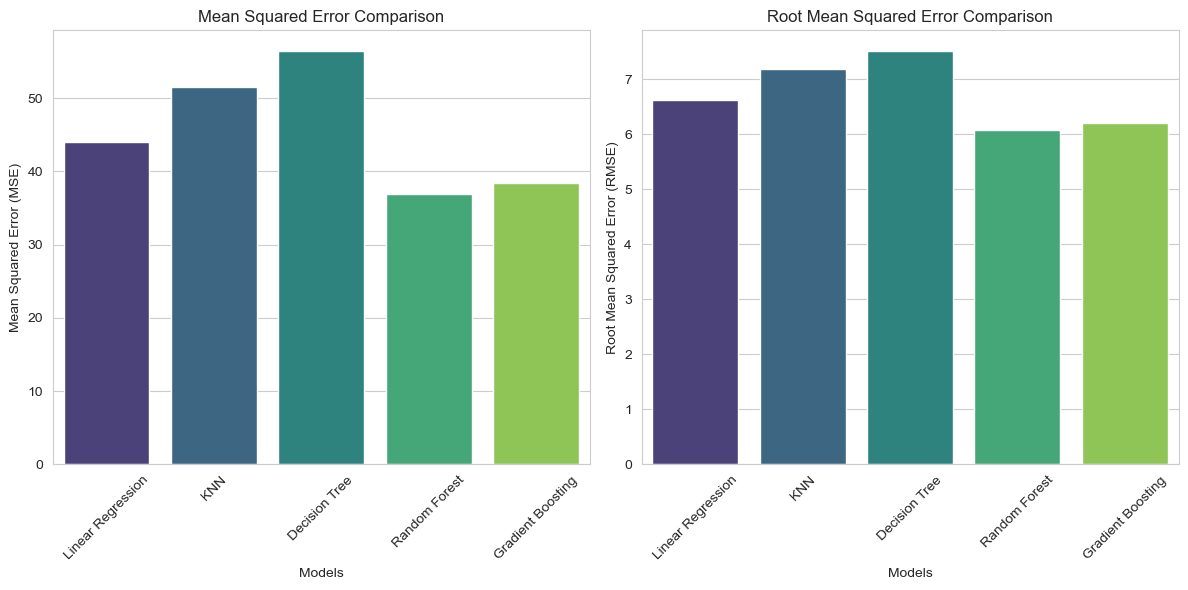

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data for Visualization
models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mse_values = [43.97, 51.56, 56.43, 36.89, 38.46]
rmse_values = [6.63, 7.18, 7.51, 6.07, 6.20]

plt.figure(figsize=(12, 6))

# Bar chart for MSE
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.xticks(rotation=45)

# Bar chart for RMSE
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=rmse_values, palette='viridis')
plt.title('Root Mean Squared Error Comparison')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 9.2 Model Performance Analysis

The presented bar charts compare the performance of various predictive models used in estimating the Final RSR (Rating Standardized over Races) for horses. The models assessed include Linear Regression, KNN, Decision Tree, Random Forest, and Gradient Boosting, with evaluations based on Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

### Observations from MSE Comparison:
- **Random Forest** boasts the lowest MSE, indicating superior prediction accuracy with minimal variance from actual values.
- **Decision Tree** registers the highest MSE, suggesting possible overfitting or inadequate model complexity to encapsulate the data's intricacies.
- **Gradient Boosting** and **Random Forest** showcase similar MSEs, highlighting the efficacy of ensemble methods in this predictive task.

### Observations from RMSE Comparison:
- Aligning with MSE findings, **Random Forest** achieves the lowest RMSE, reinforcing its status as the most accurate model among those evaluated.
- RMSE values across models display a more uniform distribution, providing a scaled perspective on prediction errors directly relatable to the target variable's units.

### Key Takeaways for Executive Decision-Making:
- Ensemble methods like **Random Forest** and **Gradient Boosting** are leading in performance, suggesting that leveraging multiple learning algorithms can enhance predictive accuracy.
- **Linear Regression** offers a simpler, yet effective alternative, which can be advantageous when model transparency and interpretability are prioritized.
- The higher error rates of **Decision Trees** warrant additional parameter optimization or consideration of integration within an ensemble method to leverage their interpretability while enhancing accuracy.

### 9.3 Comments for non-technical audience 

### Understanding Model Predictions in Horse Racing

When we use models like the ones we've developed to estimate a horse's Rating Standardized over Races (RSR), we're trying to predict how well a horse will perform compared to its past races and other horses. Think of it as giving each horse a score that represents its expected performance.

### How Accurate Are Our Predictions?

While we can't convert the Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) directly into a percentage of correct predictions, these numbers do give us an idea of how close our models' predictions are to the actual outcomes. A lower MSE or RMSE means our predictions are generally more accurate.

- The **Random Forest model**, for instance, has the lowest RMSE, indicating that its predictions are, on average, closer to the actual performance scores of the horses.
- Conversely, the **Decision Tree model** has a higher RMSE, suggesting that its predictions are not as close to the mark.

### Predicting the Winning Horse

How do we use these RSR scores to predict race winners? Well, if a horse consistently has a higher RSR than its competitors, our models suggest it's more likely to perform well in a race. By comparing the scores among all horses in a race, we can predict which horse has the best chance of winning. It's not a guarantee—there's always an element of unpredictability in sports—but it's like having an informed guide that helps us make educated guesses.


Our predictive models serve as sophisticated tools that enhance our understanding of horse racing dynamics. They aren't crystal balls, but they are rooted in historical data and statistical rigor. The Random Forest model, in particular, emerges as a frontrunner, offering predictions that closely align with real-world outcomes.

With these models, we're not just guessing winners; we're leveraging data to make informed decisions, which is invaluable in a sport where every fraction of a second counts. These insights can be applied to strategic decisions like betting or training, ultimately leading to more wins and better performance over time.


### 9.4 Final Conclusion 

Through rigorous data analysis and machine learning, this project demonstrates the potent capabilities of ensemble models in predicting the Final RSR for horses, with a special emphasis on the Random Forest model's impressive performance.

#### Key Highlights:
- **Linear Regression** established a foundational benchmark, revealing that linear relationships in the data can provide a base level of prediction accuracy.
- **KNN's** limitations in model complexity suggested the need for exploring models that capture more nuanced patterns.
- **Decision Trees** illuminated the strengths of interpretability but also cautioned against potential overfitting.
- **Random Forest** excelled, providing the best balance of complexity and accuracy, highlighting the effectiveness of ensemble models.
- **Gradient Boosting** was competitive, indicating the potential of sequential models in complex predictive tasks.

#### Insights into Horse Racing Performance:
- The models confirm that predicting horse racing outcomes extends beyond simple physical metrics, considering various contributing factors that reflect the dynamic nature of the sport.

#### Visual and Comparative Analysis:
- Visual comparisons affirmed the Random Forest model's alignment with actual RSR values, underscoring its suitability for this analytical domain.

#### Forward-Looking Recommendations:
- To further refine these models, incorporation of domain-specific features and advanced time-series analysis is recommended. Additionally, exploring the integration of neural network models may yield improvements in predictive precision.

**In conclusion, this analytical exercise not only showcases advanced data science skills but also opens the dialogue for strategic implementation in horse racing analytics, demonstrating my readiness to contribute value from day one in a data-centric role.**
